In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import string
import re

import warnings
# warning.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('max_colwidth', None)

In [ ]:
import spacy
import nltk
print(nltk.__version__)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')        # Loading the punkt module, used in Tokenization
nltk.download('omw-1.4')      # Dependency for Tokenization

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

3.8.1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=fe2c399fe8762f921d9e2ba58e446454e9049a1d0cd37eb85f777123abf49d99
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
!pip install contractions



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.0 MB/s eta 0:00:00


In [ ]:
import unidecode
import contractions
from autocorrect import Speller
spell = Speller(lang = 'en')

In [ ]:
nlp = spacy.load('en_core_web_sm')
# loading the stopwords
spacy_stopwords = nlp.Defaults.stop_words


# **First Steps - Read and check file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Excel file
file_path = '/content/drive/MyDrive/Capstone/Data Set - industrial_safety_and_health_database_with_accidents_description.xlsx'
df = pd.read_excel(file_path)

In [ ]:
print(f"The Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The Dataset has 425 rows and 11 columns


In [ ]:
print("\nFirst 5 rows of the dataset:")
print(df.head(5))


First 5 rows of the dataset:
   Unnamed: 0       Data   Countries     Local Industry Sector Accident Level  \
0           0 2016-01-01  Country_01  Local_01          Mining              I   
1           1 2016-01-02  Country_02  Local_02          Mining              I   
2           2 2016-01-06  Country_01  Local_03          Mining              I   
3           3 2016-01-08  Country_01  Local_04          Mining              I   
4           4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others 

In [ ]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.6+ K

In [ ]:
#Rename the columns that are misspelled
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Industry Sector':'Industry_Sector','Accident Level':'Accident_Level','Potential Accident Level':'Potential_Accident_Level',
'Genre':'Gender', 'Employee or Third Party':'Employee_type','Critical Risk':'Critical_Risk'}, inplace=True)
df.head(5)

,Unnamed: 0,Date,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_type,Critical_Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


# **EDA**

In [ ]:
#Checking Missing and Unique Values in each column
print("Dataset Information:")
tmp1 = pd.DataFrame(df.dtypes)
tmp1['MissingVal'] = df.isnull().sum()
tmp1['Unique']=df.nunique()
tmp1

Dataset Information:


,0,MissingVal,Unique
Unnamed: 0,int64,0,425
Date,datetime64[ns],0,287
Country,object,0,3
Local,object,0,12
Industry_Sector,object,0,3
Accident_Level,object,0,5
Potential_Accident_Level,object,0,6
Gender,object,0,2
Employee_type,object,0,3
Critical_Risk,object,0,33


**Observation:**

There are no missing values in any of the columns. No need to do any NULL value treatment.

In [ ]:
for i in df.columns[2:10]:
    # print('--'*30)
    print(f'Unique values of "{i}"')
    print('---'*30)
    print(df[i].unique())
    print("\n")

Unique values of "Country"
------------------------------------------------------------------------------------------
['Country_01' 'Country_02' 'Country_03']


Unique values of "Local"
------------------------------------------------------------------------------------------
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']


Unique values of "Industry_Sector"
------------------------------------------------------------------------------------------
['Mining' 'Metals' 'Others']


Unique values of "Accident_Level"
------------------------------------------------------------------------------------------
['I' 'IV' 'III' 'II' 'V']


Unique values of "Potential_Accident_Level"
------------------------------------------------------------------------------------------
['IV' 'III' 'I' 'II' 'V' 'VI']


Unique values of "Gender"
----------------------------------------------------------------------------------

**Observations**

There are 3 countries, 12 Locals, 3 Industry sectors, 5 accident levels, 6 potential accident levels, 3 Employee types and 33 Critical Risks in the given dataset

Five types of accident levels in increasing order of serverity are I , II , III , IV , V

Potential Accident Levels has an addition severe level of VI

In [ ]:
df.duplicated().sum()

0

In [ ]:
print("\nDuplicate Values in Description column:")
df.Description.duplicated(keep=False).sum()


Duplicate Values in Description column:


26

In [ ]:
#Display all the duplicated Descriptions for analyzing them
dup = df.Description.duplicated(keep=False)
print(df[dup])

     Unnamed: 0       Date     Country     Local Industry_Sector  \
37           37 2016-02-24  Country_02  Local_07          Mining   
38           38 2016-02-24  Country_02  Local_07          Mining   
76           88 2016-04-01  Country_01  Local_01          Mining   
77           89 2016-04-01  Country_01  Local_01          Mining   
130         142 2016-05-26  Country_03  Local_10          Others   
131         143 2016-05-26  Country_03  Local_10          Others   
143         155 2016-06-08  Country_03  Local_10          Others   
144         156 2016-06-08  Country_03  Local_10          Others   
166         180 2016-07-07  Country_01  Local_03          Mining   
167         181 2016-07-07  Country_01  Local_03          Mining   
261         275 2016-12-01  Country_01  Local_03          Mining   
262         276 2016-12-01  Country_01  Local_03          Mining   
263         277 2016-12-01  Country_01  Local_03          Mining   
302         316 2017-01-21  Country_02  Local_02

**Observations**

It is observed after going over duplicates by a case-by-case basis, all the duplicate rows refer to cases of accidents to multiple individuals present in the same situation. Hence they will be taken as seperate events for training the model instead of being considered as duplicate rows. So none of the rows will be dropped.

# **Visualizations**

**Distribution of Accident Levels and Potential Accident Levels**

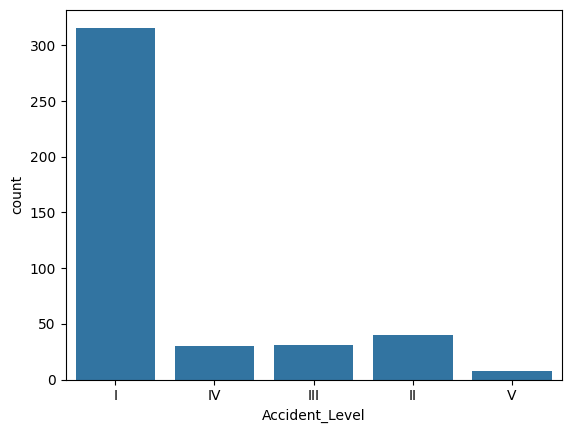

--------------------------------------------------

Accident Level Distribution
Accident_Level
I      316
II      40
III     31
IV      30
V        8
Name: count, dtype: int64

Accident Level Distribution by Percentage
Accident_Level
I     0.74
II    0.09
III   0.07
IV    0.07
V     0.02
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x = 'Accident_Level', data = df)
plt.show()

print("-"*50)

print("\nAccident Level Distribution")
print(df['Accident_Level'].value_counts())
# checking the percentages
print("\nAccident Level Distribution by Percentage")
print(df['Accident_Level'].value_counts(normalize = True))

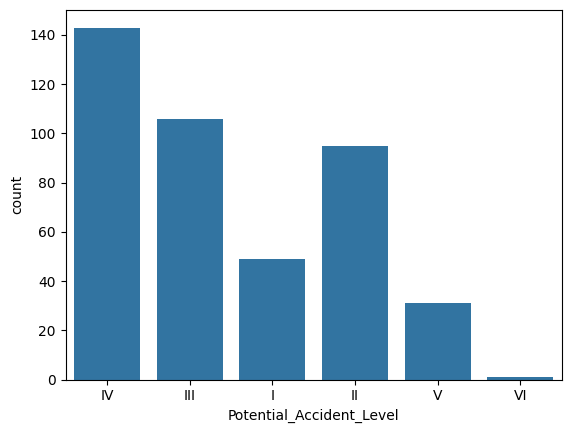

--------------------------------------------------

Potential Accident Level Distribution
Potential_Accident_Level
IV     143
III    106
II      95
I       49
V       31
VI       1
Name: count, dtype: int64

Potential Accident Level Distribution by Percentage
Potential_Accident_Level
IV    0.34
III   0.25
II    0.22
I     0.12
V     0.07
VI    0.00
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x = 'Potential_Accident_Level', data = df)
plt.show()

print("-"*50)

print("\nPotential Accident Level Distribution")
print(df['Potential_Accident_Level'].value_counts())
# checking the percentages
print("\nPotential Accident Level Distribution by Percentage")
print(df['Potential_Accident_Level'].value_counts(normalize = True))

**Observations**

The number of cases of Accident Level I is exceedingly high compared to other Accident Levels

This shows a case of highly imbalanced data.

The number of cases of Potential Accident Levels is a much more balanced but there is only one case of Potential Accident Level VI

**Distribution of Accident Levels in each Industry Sector**

In [ ]:
print(df['Industry_Sector'].value_counts())

Industry_Sector
Mining    241
Metals    134
Others     50
Name: count, dtype: int64


In [ ]:
value_counts = df.groupby('Industry_Sector')['Accident_Level'].value_counts()
print(value_counts)

Industry_Sector  Accident_Level
Metals           I                 107
                 II                 12
                 III                 7
                 IV                  7
                 V                   1
Mining           I                 167
                 II                 26
                 IV                 21
                 III                20
                 V                   7
Others           I                  42
                 III                 4
                 II                  2
                 IV                  2
Name: count, dtype: int64


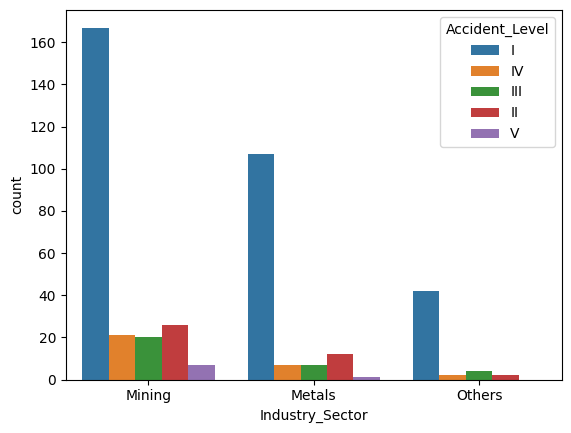

In [ ]:
sns.countplot(x='Industry_Sector', hue='Accident_Level', data=df)
plt.show()

**Observations**

Mining has the most cases of accidents reported followed by Metals

The number of cases of Accident Level I is exceedingly high compared to other Accident Levels in all 3 Industry Sectors

The proportion of Accident Levels within each Industry Sector remains almost equal


**Distribution of Accident Levels by Country**

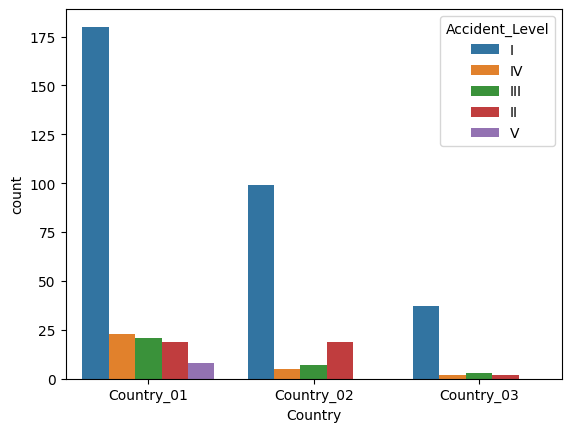

In [ ]:
sns.countplot(x='Country', hue='Accident_Level', data=df)
plt.show()

**Observations**

Country_01 has the most cases of accidents reported followed by Country_02 and far less in Country_03

The number of cases of Accident Level I is exceedingly high compared to other Accident Levels in all 3 Countries

The proportion of Accident Levels within each Country remains almost equal

**Distribution of Accident Levels by Local**

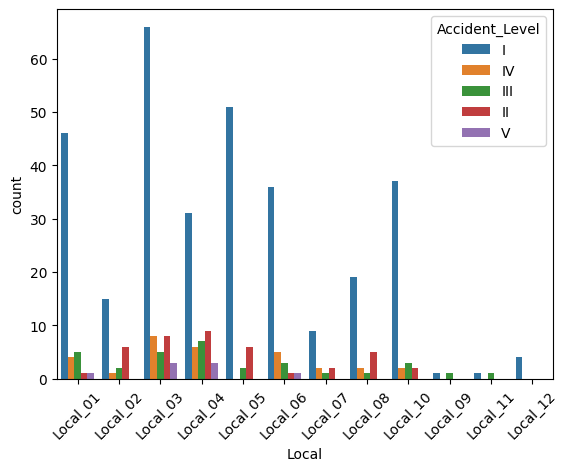

In [ ]:
sns.countplot(x='Local', hue='Accident_Level', data=df)
plt.xticks(rotation=45)
plt.show()

**Distribution of Accident Levels across Gender**

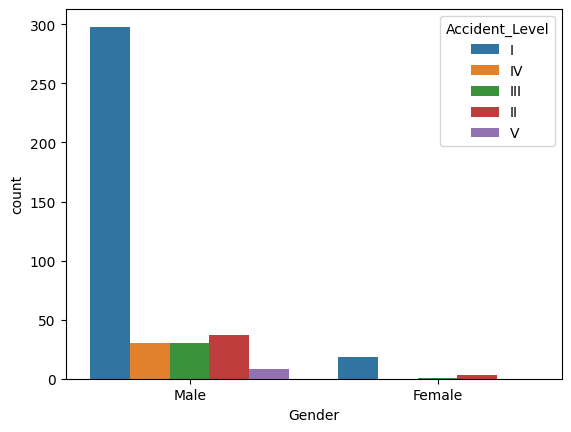

In [ ]:
sns.countplot(x='Gender', hue='Accident_Level', data=df)
plt.show()

**Observations**

There are exceedingly high number of accidents in Male compared to Female

**Distribution of Accident Levels in each Employee Type**

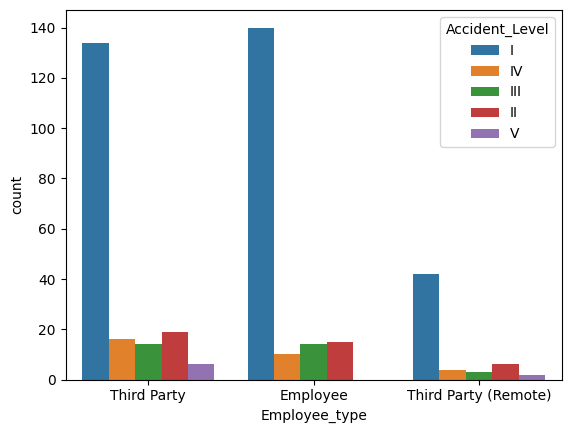

In [ ]:
sns.countplot(x='Employee_type', hue='Accident_Level', data=df)
plt.show()

**Observations**

Employees and Third Party have almost equal number of cases of accidents reported followed by Third Party(Remote)

The number of cases of Accident Level I is exceedingly high compared to other Accident Levels in all 3 Employee_Type

The proportion of Accident Levels within each Employee_Type remains almost equal

**Final Observations**

The dataset is highly imbalanced. We will do data balancing procedures before building a model.

The ratio of Accident Level is almost the same across all other attributes ie. it is not dependent on the Industry Sector or Country or Local or Employee Type or Gender. This is evident from the distribution of Accident level across all 3 sectors (Metals, Mining, Others) and across all 3 countries.

# **NLP preprocessing**

In [ ]:
#Create a copy of the original dataset
df_original = df.copy()

In [ ]:
# df= df_original.copy()

In [ ]:
# Initialize an empty list
long_words = []

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    # Split the sentence into words
    words = row['Description'].split()

    # Filter out words with length less than or equal to 10
    long_words.extend([word for word in words if len(word) > 10])

# Print the list of long words
print(len(long_words))
print(long_words)

722
['maintenance,', 'intermediate', 'centralizer', 'Immediately', 'sub-station', 'collaborator', 'collaborator', 'approximately', 'penultimate', 'collaborators', 'anti-clockwise', 'Approximately', 'circumstances', 'Fernández-injured-the', 'depressurisation', 'collaborator', 'collaborator', 'approximately', 'transmission', 'unexpectedly', 'electrician', 'transmission', 'excoriation', 'displacement,', 'subsequently', 'collaborator', 'immediately', 'polyurethane', 'positioning', 'immediately', 'evaluation.', 'collaborator', 'installation', 'intersection', 'thermomagnetic', 'accumulation', 'circumstances', 'perforation', 'scaffolding,', 'scaffolding,', 'scaffolding', 'overheating', 'transferred', 'disconnection', 'intersection', 'Cajamarquilla', 'circumstances', 'concentrate,', 'Afterwards,', 'horizontally,', "assistant's", "assistant's", 'deslaminadora', 'collaborator', 'immediately', "collaborator's", 'transferred', 'communicates', 'intersection', 'ventilation', 'positioning', 'semi-kne

**Observations**

There are a lot of words that are very long that will have no significance in model building later. We can delete these words when performing other preprocessing steps

In [ ]:
def preprocess_description(text):

    # Convert text to lowercase
    text = text.lower()

    # Remove accented characters
    text = unidecode.unidecode(text)

    # Remove punctuation
    # text = "".join([c for c in text if c not in string.punctuation])

    #Remove times
    text = ''.join(re.sub('(1[0-2]|0?[1-9]):([0-5][0-9]) ?([AaPp].?[Mm])', ' ', text))

    # Remove digits
    text = "".join([c for c in text if c not in string.digits ])

    #Fix contractions in words
    text = contractions.fix(text)

    #Remove other unneccessary characters
    text = "".join([c for c in text if c in string.printable ])

    # Using regex pattern to replace non-alphanumeric characters with a blank string
    text = ''.join(re.sub('[^A-Za-z0-9]+', ' ', text))

     # Using regex pattern to replace long words with more than 10 characters with a blank string
    text = ''.join(re.sub(r"\b\w{11,}\b", ' ', text))

     # Using regex pattern to replace two letter words with a blank string
    text = ''.join(re.sub('\b[a-z][a-z]\b', ' ', text))

    # text = text.strip()

    #Remove stopwords
    text = ' '.join([word for word in word_tokenize(text) if word not in spacy_stopwords])

    #Remove all named entities
    text = ' '.join([token.text for token in nlp(text) if token.ent_type_ == ''])

    # Using regex pattern to replace three letter words with a blank string
    text = ''.join(re.sub('\b[a-z][a-z][a-z]\b', ' ', text))

    # Using regex pattern to replace single letter with a blank string
    text = ''.join(re.sub('\b[a-z]\b', ' ', text))

    text = text.strip()

    #Using Speller to spellcheck
    text = ''.join(spell(text))

    #Lemmatization
    text = ' '.join([token.lemma_ for token in nlp(text)])

    text = ''.join(re.sub(r'\s[a-z]\s', ' ', text))
    text = ''.join(re.sub(r'\s[a-z][a-z]\s', ' ', text))
    text = ''.join(re.sub(r'\s[a-z][a-z][a-z]\s', ' ', text))
    text = ''.join(re.sub('\s\w{12,}\s', ' ', text))

    return text

**Observations**

The preprocess function does the following steps for cleaning the Description.

*   Converts into lower case
*   Removes accented characters
*   Removes Punctuation
*   Removes Timestamps
*   Removes Numerals
*   Fixes contracted words and expands them into full form
*   Removes Non-alphanumeric / Special/ unnecessary characters
*   Removes single, two and three letter words
*   Removes extra long words with more than 10 characters long
*   Removes stopwords
*   Removes Named-entities - Names of people, places, cities etc
*   Removes extra whitespaces
*   Performs a Spellcheck and corrects mistakes
*   Converts the words into lemmas


In [ ]:
df['Cleaned_Description'] = df['Description'].apply(preprocess_description)

In [ ]:
df.loc[0:10, ['Description','Cleaned_Description']]

,Description,Cleaned_Description
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",remove drill supervisor proceed loose support facilitate removal mechanic support drill equipment pull hand accelerate removal moment slide point support tighten finger mechanic drilling beam jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",activation sodium sulfide pump piping couple sulfide solution design area reach maid emergency shower direct ambulatory doctor later hospital note sulfide solution
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",sub station mile locate level excavation work pick hand tool rock flat beak bounce steel safety shoe metatarsal area leave foot cause injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",nv ob personnel begin task unlock squet bolt machine bolt identify hexagonal head wear proceed cristobal auxiliary assistant climb platform exert pressure hand key prevent come bolt moment rotate lever anti clockwise direction leave bolt palm leave hand cause injury
4,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.",group leader fernandez injured company improve perform removal pump march weight lock proceed heating come fall distance meter high instead right foot worker cause injury describe
5,"During the unloading operation of the ustulado Bag there was a need to unclog the discharge mouth of the silo truck. In performing this procedure, there was a maneuver of unhooking the hose without the total depressurisation of the mouth, projecting ustulado powder in the collaborator caused irritation in the eyes.",unload operation ustulado need uncle discharge mouth silo truck perform procedure maneuver unlock total mouth project ustulado powder cause irritation eye
6,"The collaborator reports that he was on street 09 holding in his left hand the volumetric balloon, when he slipped and when placing his hand on the ground the volumetric balloon ended up breaking caused a small wound in his left hand.",report street hold left hand volumetric balloon slip place hand ground volumetric balloon break cause small wound leave hand
7,"At approximately 04:

**Analysis of Data Cleaning**

In [ ]:
#Creating two new columns to calculate length of original description and Cleaned Description
df['Original_Description_Length'] = df['Description'].str.split().str.len()
df['Cleaned_Description_Length'] = df['Cleaned_Description'].str.split().str.len()
df.loc[50:60, ['Description','Cleaned_Description', 'Original_Description_Length','Cleaned_Description_Length']]

,Description,Cleaned_Description,Original_Description_Length,Cleaned_Description_Length
50,"The operator was feeding a bag of big bag containing scraps of Zn sheets. During lifting, this loaded bag is released from the hook of the hoist, making abrupt contact with the liquid zinc of the furnace, generating an explosion and causing the operator to be hit with liquid zinc.",operator feed big contain scrap sheet lift loaded release hook hoist make abrupt contact liquid zinc furnace generate explosion cause operator liquid zinc,50,23
51,"In circumstances that two workers of the company INCIMMET made the loading of explosives using an equipment anfoloader, in a front of the work - sustained with shotcreterepentinamente of the right superior part of the crown, a piece of rock of approx. 9. kg, (0.2mx0.15mx0.10m), impacting on the basket and on the back of the helper who was in the basket suspended at 2.2 m height, moments later a block of rock is detached from the wall of the gable approx. 1,500 kg. (1.20mx1.10mx0.40m), which impacts the ampoloader team and part of this block injures the operator of the ampoloader team who was standing on the ground. The equipment anfoloader has a cabin with protection ROPs and FOPs, at the time of the accident both workers used helmets and safety boots. Both suffered polyontusions and minor scoria injuries.",worker company incimmet loading explosive equipment anfoloader work sustain right superior crown piece rock approx mx impact basket helper basket suspend height moment later block rock detach wall gable approx mx impacts ampoloader team block injure operator ampoloader team stand ground equipment anfoloader cabin protection top time accident worker helmet safety boot suffer minor storia injury,138,56
52,"In circumstances that two workers of the company INCIMMET fectuaban the loading of explosives using an equipment anfoloader, in a front of the work - sustained with shotcreterepentinamente of the right superior part of the crown, a piece of rock of approx. 9. kg, (0.2mx0.15mx0.10m), impacting on the basket and on the back of the helper who was in the basket suspended at 2.2 m height, moments later a block of rock is detached from the wall of the gable approx. 1,500 kg. (1.20mx1.10mx0.40m), which impacts the ampoloader team and part of this block injures the operator of the ampoloader team who was standing on the ground. The equipment anfoloader has a cabin with protection ROPs and FOPs, at the time of the accident both workers used helmets and safety boots. Both suffered polyontusions and minor scoria injuries.",worker company incimmet fectuaban loading explosive equipment anfoloader work sustain right superior crown piece rock approx mx impact basket helper basket suspend height moment later block rock detach wall gable approx mx impacts ampoloader team block injure operator ampoloader team stand ground equipment anfoloader cabin protection top time accident worker helmet safety boot suffer minor storia injury,138,57
53,"The mechanic assistant after throwing the wooden blocks of support of the stabilizer of the Hiab crane truck to the ground, when descending from the truck by the access ladder when arriving at the last step jumps towards the ground - height of 69cm - treading the edge of one of The wooden blocks cause an injury to the left ankle.",mechanic assistant throw wooden block support stabilizer crane truck ground descend truck access ladder arrive step jump ground height read edge wooden block injury leave ankle,61,26
54,"By manually moving a steel cabinet for disposal with the help of another employee, the operator had his finger pressed down between the wall and the cabinet causing injury.",manually move steel cabinet disposal help employee operator finger press wall cabinet cause injury,29,14
55,"During the discharge of waste, the operator proceeds to remove a bag that was under the hose rolled, in this circumstance one of the ends of the hose moves in the direction of the face of 

Most frequently occuring words in Description in the original Dataset

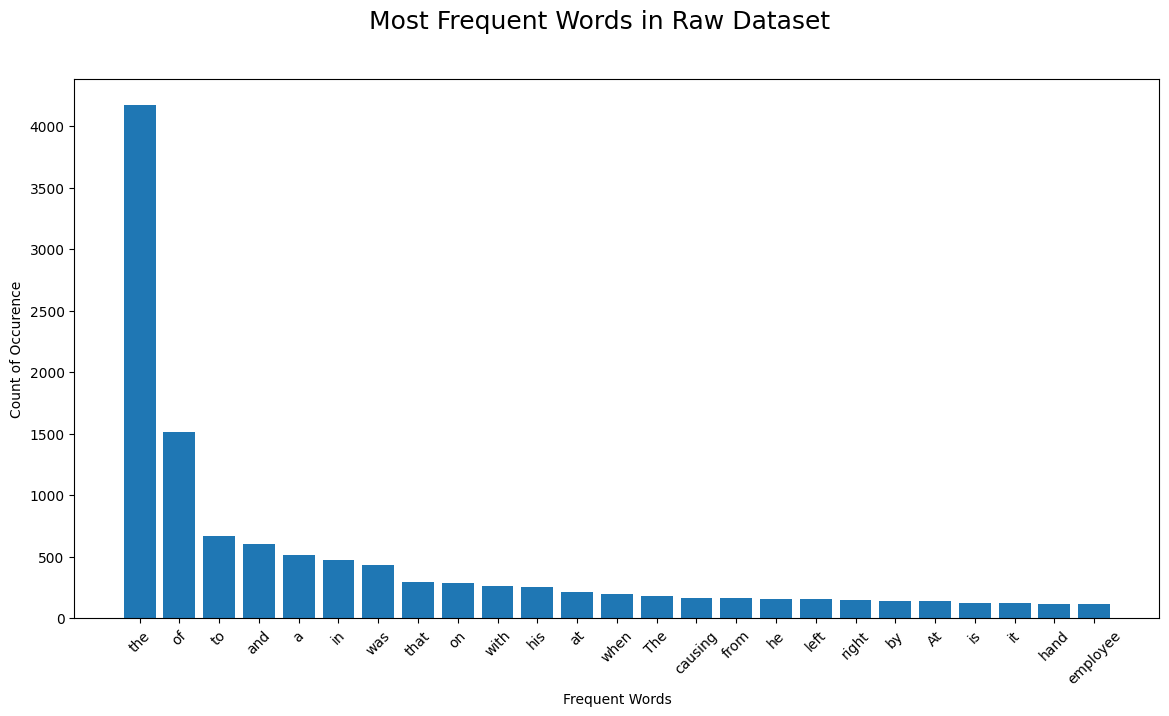

In [ ]:
all_words = df['Description'].str.split(expand=True).unstack().value_counts()
plt.figure(figsize=(14,7))
plt.suptitle('Most Frequent Words in Raw Dataset',fontsize =18)
plt.xlabel('Frequent Words')
plt.ylabel('Count of Occurence')
plt.bar(all_words[0:25].index,height = all_words[0:25])
plt.grid(False)
plt.xticks(rotation=45)
plt.show();

Most frequently occuring words in Description after cleaning using NLP Preprocessing procedures

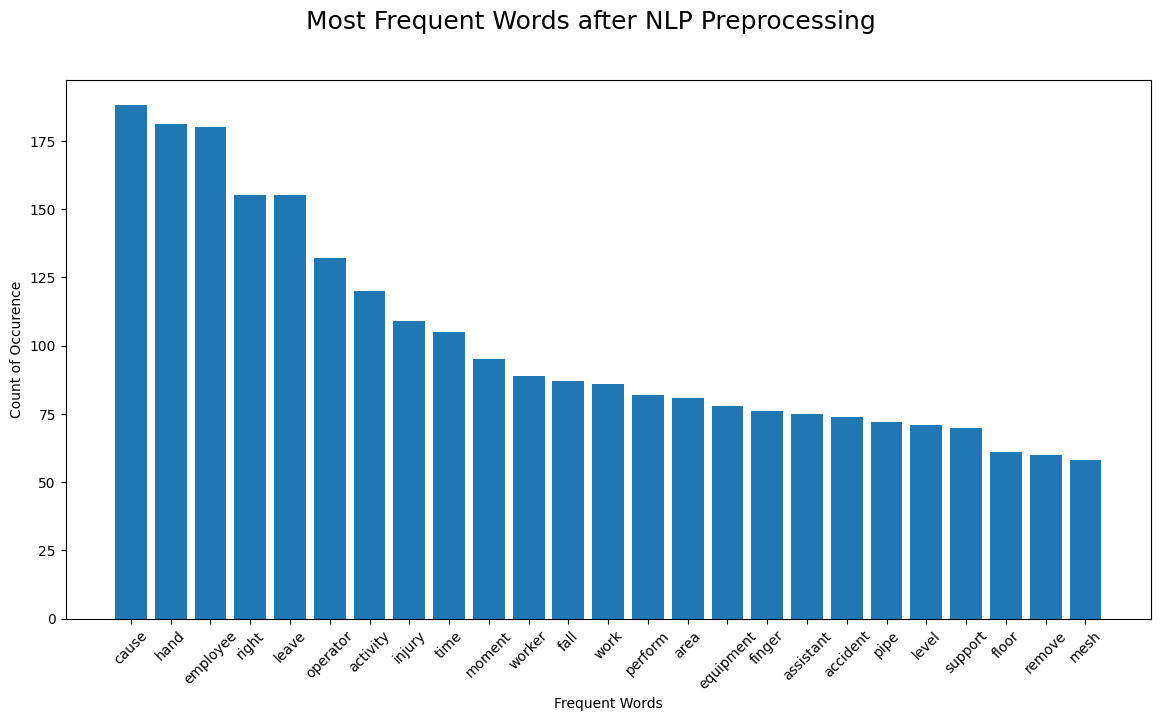

In [ ]:
all_words = df['Cleaned_Description'].str.split(expand=True).unstack().value_counts()
plt.figure(figsize=(14,7))
plt.suptitle('Most Frequent Words after NLP Preprocessing',fontsize =18)
plt.xlabel('Frequent Words')
plt.ylabel('Count of Occurence')
plt.bar(all_words[0:25].index,height = all_words[0:25])
plt.grid(False)
plt.xticks(rotation=45)
plt.show();

**Observation**

It is seen that after cleaning the raw dataset the words that provide more context and information about the accidents are in the Cleaned_Description column. These will be used for embeddings and model building.


**Generate Wordcloud to visualize the cleaned Descriptions**

There are 76346 words in the combination of all texts.


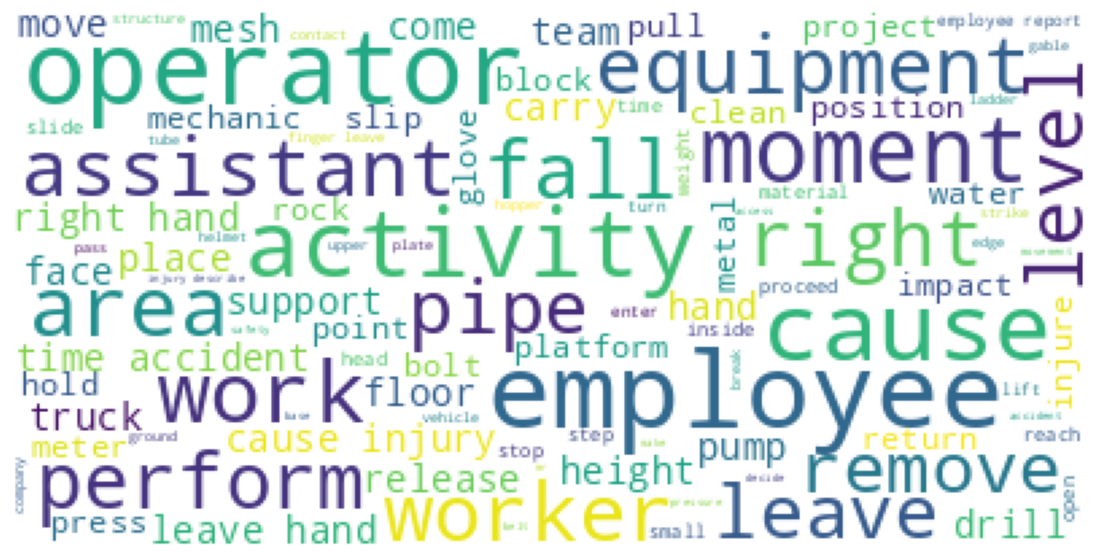

In [ ]:
all_texts = " ".join(texts for texts in df.Cleaned_Description)
print ("There are {} words in the combination of all texts.".format(len(all_texts)))
wordcloud = WordCloud(max_font_size = 40, max_words=100, background_color="white").generate(all_texts)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Calculate the desired Summary
summary_stats = df[['Original_Description_Length', 'Cleaned_Description_Length']].agg(['max', 'min', 'mean'])

# Display the results as a table
print(summary_stats.to_string())


      Original_Description_Length  Cleaned_Description_Length
max                        183.00                       82.00
min                         16.00                        7.00
mean                        65.66                       26.25


**Observation**

It is seen that the length of the descriptions has been reduced after cleaning by removing the unnecessary words. The average length of cleaned descriptions has been reduced to 26 from the earlier high value of 65

<Axes: xlabel='Cleaned_Description_Length'>

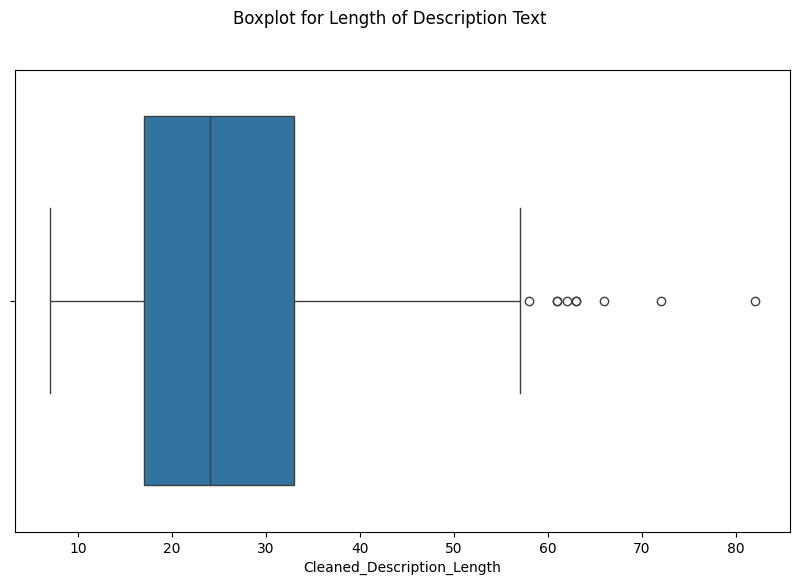

In [ ]:
# distribution of length of the cleaned description
plt.figure(figsize=(10,6))
plt.suptitle('Boxplot for Length of Description Text')
sns.boxplot(x = 'Cleaned_Description_Length', data=df)
# plt.title('Box plot for P_incidence')

There are some very extreme outliers in the Cleaned Description column.

In [ ]:
df.to_csv('DataSet_Cleaned_Descriptions.csv', index=False)


We have saved the Cleaned Dataset to a csv for future use

# **Embeddings, Model Building**